<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Загрузим данные и нужные нам библиотеки.

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('/datasets/insurance.csv')
state = np.random.RandomState(12345)

display(data.head(20))
data.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Построим гистограммы по всем столбцам для ознакомительной оценки распределений.

array([[<AxesSubplot:title={'center':'Пол'}>,
        <AxesSubplot:title={'center':'Возраст'}>],
       [<AxesSubplot:title={'center':'Зарплата'}>,
        <AxesSubplot:title={'center':'Члены семьи'}>],
       [<AxesSubplot:title={'center':'Страховые выплаты'}>,
        <AxesSubplot:>]], dtype=object)

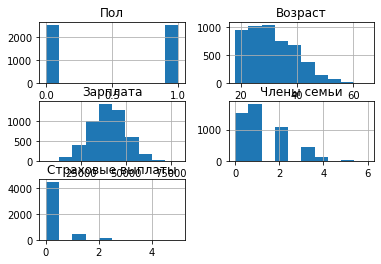

In [2]:
data.hist()

По полу клиенты распределены равномерно. По возрасту преобладают лица от 20 до 30 с постепенным снижением количества клиентов с увеличением их возраста. По зарплате отмечается нормальное распределение. По количеству детей- основная масса клиентов с 1-2 детей, либо без них. Но количеству страховых выплат можно сделать вывод, что они проводятся достаточно редко.

Разделим данные на обучающую и целевую выборки:

In [3]:
target = data['Страховые выплаты']
features = data.drop('Страховые выплаты', axis=1)

display(target.head())

display(features.head())

0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Заниматься обработкой данных и делением данных на тренировочную и тестовую выборки мы не будем, так как нашей целью не является улучшение качества модели.

## Умножение матриц

Создадим класс линейной регресси:

In [4]:
class LR:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим нашу модель на неизмененных выборках:

In [5]:
model = LR()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

0.42494550286668

Теперь создами случайную матрицу, размером равнуб обучающей выборке:

In [6]:
key = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
key

array([[-2.01894505,  1.40327509, -0.00731591, -0.58023833],
       [ 0.0643464 , -1.15465512,  0.32146182, -1.45947127],
       [ 0.87159221, -0.72692182,  2.04463699, -1.32164043],
       [-0.20881298, -0.80164391,  0.11104776,  0.27432931]])

Проверим созданную матрице на обратимость:

In [7]:
key @ np.linalg.inv(key)

array([[ 1.00000000e+00,  7.99018610e-18,  2.01748781e-18,
        -1.43116439e-16],
       [-9.26297764e-18,  1.00000000e+00,  1.14872132e-17,
        -9.53937880e-17],
       [ 7.00416729e-17, -2.11510987e-16,  1.00000000e+00,
         2.24863846e-16],
       [-8.52944467e-18,  1.66581911e-17,  3.84459853e-18,
         1.00000000e+00]])

Закодируем нашу обучающую выборку путем умножения на случайную обратимую матрицу:

In [8]:
encoded_features = features @ key
encoded_features

,0,1,2,3
0,43231.383919,-36102.061406,101427.278134,-65613.509782
1,33123.254993,-27676.944867,77711.103730,-50289.197860
2,18305.302396,-15298.843178,42946.699083,-27796.773791
3,36346.328687,-30338.490859,85268.335078,-55142.506356
4,22748.339361,-19003.586520,53374.018929,-34536.260774
...,...,...,...,...
4995,31117.225869,-25985.042537,73002.763399,-47222.880048
4996,45673.410620,-38130.763185,107150.018775,-69303.306461
4997,29547.845125,-24667.346023,69319.845131,-44832.251496
4998,28499.835411,-23796.747521,66867.027404,-43249.507826


Обучим нашу модель линейной регресии на закодированных данных:

In [9]:
model = LR()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
r2_score(target, predictions)

0.42494550286667576

Разницы в предсказаниях модели, обученной на неизмененной и закодированной выборках нет.
Попробуем объяснить это с помощью данных нам в условиях формул:

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

## Алгоритм преобразования

**Алгоритм**

-Создание случайной обратимой матрицы размером, равным размеру кодуриемой матрицы.

-Проверка созданной матрицы на обратимость.

-Получение произведения матрицы признаков и случаной матрицы.

Реализуем алгоритм в функции encode:

In [10]:
def encode(features):
    random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
    encoded_features = features.dot(random_matrix)
    return encoded_features

## Проверка алгоритма

с помощью нашей функции кодирования перезапишем в переменную encoded_features закодированные признаки и обучим на них модель:

In [11]:
encoded_features = encode(features)

In [12]:
model = LR()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
r2_score(target, predictions)

0.42494550285726207

R2 метрика не изменилась.

сравним результаты с моделью линейной регресии из библиотеки sklearn:

In [13]:
model = LinearRegression()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
r2_score(target, predictions)

0.4249455028667597

R2 метрика также не изменилась.

## Вывод:

-при изменении обучающей выборки путем умножения на матрицу, мы получим пропорциональное изменение коэффициентов линейной регрессии, что не повлияет на качество ее обучения. Таким образом, мы можем смело использовать наш алгоритм для защиты данных клиентов страховой компании «Хоть потоп» без снижения качества работы модели.